In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pandas.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
dataset.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


When we look at the data types of the features, we can see that we have some object type entries. ML algorithms can not process this this datas so we have to handle it.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Checking null variables.

In [6]:
dataset.isnull().sum().sum()

67

# Data Preprocessing

NaN Values Handling for Categorical Variables

In [7]:
# Get list of categorical variables
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


We do not have any null variable in object data type features.

In [8]:
for i in categorical_list:
    print(i, dataset[i].isnull().sum())

gender 0
ssc_b 0
hsc_b 0
hsc_s 0
degree_t 0
workex 0
specialisation 0
status 0


In [9]:
for i in categorical_list:
    print(i, pd.value_counts(dataset[i]).unique())

gender [139  76]
ssc_b [116  99]
hsc_b [131  84]
hsc_s [113  91  11]
degree_t [145  59  11]
workex [141  74]
specialisation [120  95]
status [148  67]


We have two variables for gender, ssc_b hsc_b, workex, specialisation and status. We can encode them by using Label Encoding. For hsc_s and degree_t, I will use One-Hot Encoding because there are more than two variables for these features.

# Label Encoding

Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [10]:
dataset['gender'].unique()

array(['M', 'F'], dtype=object)

In [11]:
dataset['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [12]:
dataset['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
dataset['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [14]:
dataset['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [15]:
dataset['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [16]:
gender_mapping = {'M': 0, 'F': 1}
dataset['gender'] = dataset['gender'].map(gender_mapping)

In [17]:
ssc_b_mapping = {'Others': 0, 'Central': 1}
dataset['ssc_b'] = dataset['ssc_b'].map(ssc_b_mapping)

In [18]:
workex_mapping = {'No': 0, 'Yes': 1}
dataset['workex'] = dataset['workex'].map(workex_mapping)

In [19]:
specialisation_mapping = {'Mkt&HR': 0, 'Mkt&Fin': 1}
dataset['specialisation'] = dataset['specialisation'].map(specialisation_mapping)

In [20]:
status_mapping = {'Placed': 0, 'Not Placed': 1}
dataset['status'] = dataset['status'].map(status_mapping)

In [21]:
hsc_b_mapping = {'Others': 0, 'Central': 1}
dataset['hsc_b'] = dataset['hsc_b'].map(hsc_b_mapping)

In [22]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,0,270000.0
1,2,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,1,66.28,0,200000.0
2,3,0,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,0,250000.0
3,4,0,56.00,1,52.00,1,Science,52.00,Sci&Tech,0,66.0,0,59.43,1,NaN
4,5,0,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,0,82.00,0,Commerce,77.60,Comm&Mgmt,0,91.0,1,74.49,0,400000.0
211,212,0,58.00,0,60.00,0,Science,72.00,Sci&Tech,0,74.0,1,53.62,0,275000.0
212,213,0,67.00,0,67.00,0,Commerce,73.00,Comm&Mgmt,1,59.0,1,69.72,0,295000.0
213,214,1,74.00,0,66.00,0,Commerce,58.00,Comm&Mgmt,0,70.0,0,60.23,0,204000.0


# One-Hot Encoding

One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

In this part, I converted categorical datas to the binary values. This operation increases the accuracy.

In [23]:
dataset['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [24]:
dataset['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [25]:
onehotencoder = OneHotEncoder()

In [26]:
dataset['hsc_s'] = pd.Categorical(dataset['hsc_s'])
datasetDummies_hsc_s = pd.get_dummies(dataset['hsc_s'], prefix = 'hsc_s_encoded')
datasetDummies_hsc_s

,hsc_s_encoded_Arts,hsc_s_encoded_Commerce,hsc_s_encoded_Science
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
210,0,1,0
211,0,0,1
212,0,1,0
213,0,1,0


In [27]:
dataset['degree_t'] = pd.Categorical(dataset['degree_t'])
datasetDummies_degree_t = pd.get_dummies(dataset['degree_t'], prefix = 'degree_t_encoded')
datasetDummies_degree_t

,degree_t_encoded_Comm&Mgmt,degree_t_encoded_Others,degree_t_encoded_Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
210,1,0,0
211,0,0,1
212,1,0,0
213,1,0,0


In [28]:
dataset.drop("hsc_s", axis=1, inplace=True)
dataset.drop("degree_t", axis=1, inplace=True)

In [29]:
dataset = pd.concat([dataset, datasetDummies_hsc_s], axis=1)
dataset = pd.concat([dataset, datasetDummies_degree_t], axis=1)
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_encoded_Arts,hsc_s_encoded_Commerce,hsc_s_encoded_Science,degree_t_encoded_Comm&Mgmt,degree_t_encoded_Others,degree_t_encoded_Sci&Tech
0,1,0,67.00,0,91.00,0,58.00,0,55.0,0,58.80,0,270000.0,0,1,0,0,0,1
1,2,0,79.33,1,78.33,0,77.48,1,86.5,1,66.28,0,200000.0,0,0,1,0,0,1
2,3,0,65.00,1,68.00,1,64.00,0,75.0,1,57.80,0,250000.0,1,0,0,1,0,0
3,4,0,56.00,1,52.00,1,52.00,0,66.0,0,59.43,1,NaN,0,0,1,0,0,1
4,5,0,85.80,1,73.60,1,73.30,0,96.8,1,55.50,0,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,0,82.00,0,77.60,0,91.0,1,74.49,0,400000.0,0,1,0,1,0,0
211,212,0,58.00,0,60.00,0,72.00,0,74.0,1,53.62,0,275000.0,0,0,1,0,0,1
212,213,0,67.00,0,67.00,0,73.00,1,59.0,1,69.72,0,295000.0,0,1,0,1,0,0
213,214,1,74.00,0,66.00,0,58.00,0,70.0,0,60.23,0,204000.0,0,1,0,1,0,0


All categorical variables converted to binary or numerical variables. Now we are gonna check null variables in the numerical variables.

In [30]:
numerical = (dataset.dtypes == "float64")
numerical_list = list(numerical[numerical].index)
print("Numerical variables:")
print(numerical_list)

Numerical variables:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [31]:
for i in numerical_list:
    print(i, dataset[i].isnull().sum())

ssc_p 0
hsc_p 0
degree_p 0
etest_p 0
mba_p 0
salary 67


We have 67 null variables in the 'salary' column. We will replace these null variables with the mean of all salary values.

In [32]:
dataset['salary'].fillna(dataset['salary'].mean(), inplace=True)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sl_no                       215 non-null    int64  
 1   gender                      215 non-null    int64  
 2   ssc_p                       215 non-null    float64
 3   ssc_b                       215 non-null    int64  
 4   hsc_p                       215 non-null    float64
 5   hsc_b                       215 non-null    int64  
 6   degree_p                    215 non-null    float64
 7   workex                      215 non-null    int64  
 8   etest_p                     215 non-null    float64
 9   specialisation              215 non-null    int64  
 10  mba_p                       215 non-null    float64
 11  status                      215 non-null    int64  
 12  salary                      215 non-null    float64
 13  hsc_s_encoded_Arts          215 non

In [34]:
dataset.isnull().sum()

sl_no                         0
gender                        0
ssc_p                         0
ssc_b                         0
hsc_p                         0
hsc_b                         0
degree_p                      0
workex                        0
etest_p                       0
specialisation                0
mba_p                         0
status                        0
salary                        0
hsc_s_encoded_Arts            0
hsc_s_encoded_Commerce        0
hsc_s_encoded_Science         0
degree_t_encoded_Comm&Mgmt    0
degree_t_encoded_Others       0
degree_t_encoded_Sci&Tech     0
dtype: int64

Final checks have been done and we are ready to go

In [35]:
list(dataset.columns)

['sl_no',
 'gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'degree_p',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p',
 'status',
 'salary',
 'hsc_s_encoded_Arts',
 'hsc_s_encoded_Commerce',
 'hsc_s_encoded_Science',
 'degree_t_encoded_Comm&Mgmt',
 'degree_t_encoded_Others',
 'degree_t_encoded_Sci&Tech']

In [36]:
features = [ 'gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'degree_p',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p',
 'salary',
 'hsc_s_encoded_Arts',
 'hsc_s_encoded_Commerce',
 'hsc_s_encoded_Science',
 'degree_t_encoded_Comm&Mgmt',
 'degree_t_encoded_Others',
 'degree_t_encoded_Sci&Tech']

label = ['status']

X = dataset[features]
y = dataset[label]

In [37]:
X = normalize(X, norm = 'l2')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 215
Total # of sample in train dataset: 144
Total # of sample in validation dataset: 35
Total # of sample in test dataset: 36


# Scores of Models

These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.

In [39]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 79.86111111111111
Validation score of trained model: 80.0
Test score of trained model: 83.33333333333334
 
Confussion Matrix: 
[[14  0]
 [ 6 16]]

Accuracy : 0.8333333333333334
Precision: 1.0
Recall   : 0.7272727272727273
F1 score : 0.8421052631578948
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       1.00      0.73      0.84        22

    accuracy                           0.83        36
   macro avg       0.85      0.86      0.83        36
weighted avg       0.88      0.83      0.83        36



############################################################################



MultinomialNB
Train score of trained model: 70.13888888888889
Validation score of trained model: 77.14285714285715
Test score of trained model: 55.55555555555556
 
Confussion Matrix: 
[[20 16]
 [ 0  0]]

Accuracy : 0.5555555555555556
Precision: 0.0
Recall

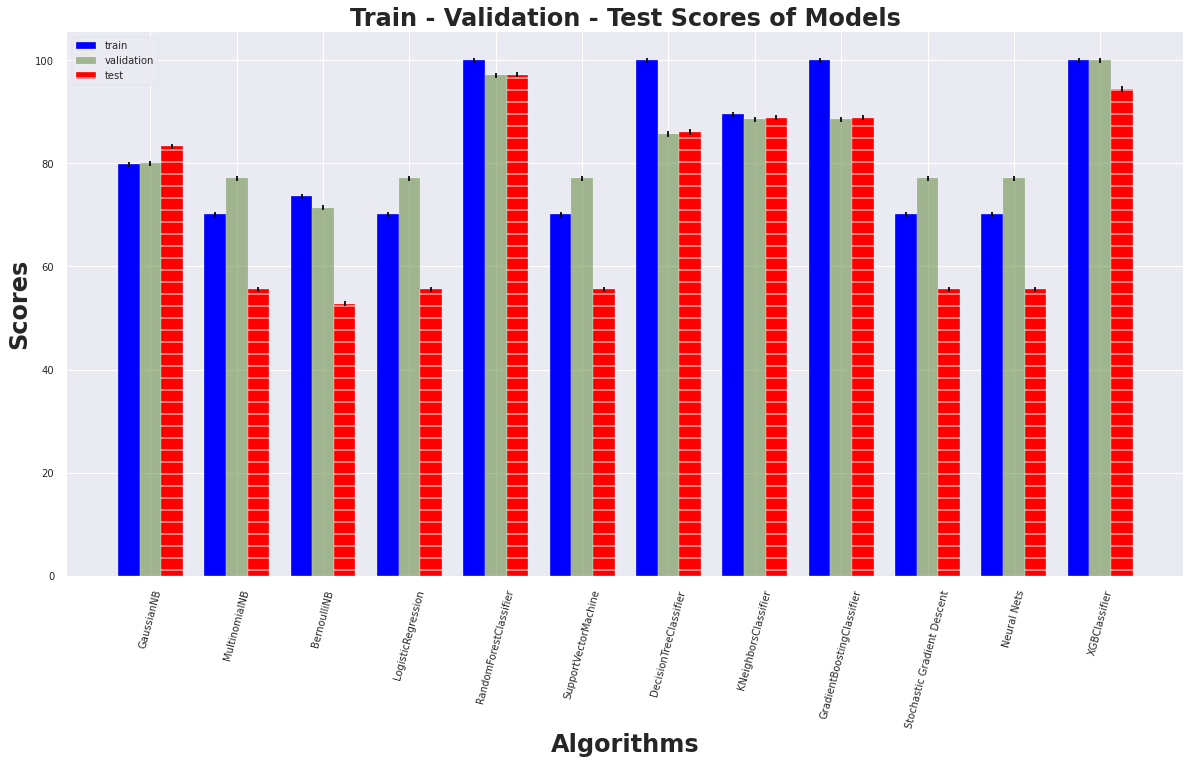

In [40]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [41]:
for i in range(12):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 83.33333333333334
Accuracy of MultinomialNB -----> 55.55555555555556
Accuracy of BernoulliNB -----> 52.77777777777778
Accuracy of LogisticRegression -----> 55.55555555555556
Accuracy of RandomForestClassifier -----> 97.22222222222221
Accuracy of SupportVectorMachine -----> 55.55555555555556
Accuracy of DecisionTreeClassifier -----> 86.11111111111111
Accuracy of KNeighborsClassifier -----> 88.88888888888889
Accuracy of GradientBoostingClassifier -----> 88.88888888888889
Accuracy of Stochastic Gradient Descent -----> 55.55555555555556
Accuracy of Neural Nets -----> 55.55555555555556
Accuracy of XGBClassifier -----> 94.44444444444444


According to results XGBClassifier and RandomForestClassifier are the best algorithms among them with 94.4% score.

# Best Features Selection

In [42]:
models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'XGBClassifier': XGBClassifier()
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

MultinomialNB
Old Shape: (215, 17) New shape: (215, 16)


BernoulliNB
Old Shape: (215, 17) New shape: (215, 8)


LogisticRegression
Old Shape: (215, 17) New shape: (215, 5)


RandomForestClassifier
Old Shape: (215, 17) New shape: (215, 6)


DecisionTreeClassifier
Old Shape: (215, 17) New shape: (215, 5)


GradientBoostingClassifier
Old Shape: (215, 17) New shape: (215, 6)


Stochastic Gradient Descent
Old Shape: (215, 17) New shape: (215, 5)


[21:25:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
[21:25:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Old Shape: (215, 17) New shape: (2